## **1. Geometric Transforms using inbuilt functions.**

In [3]:
import matplotlib.pyplot as plt
from skimage.transform import warp
from skimage import data
from skimage.transform import SimilarityTransform
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

### **a) Translation:**

▪ Translate the input image by βx and βy = (30, -10)


In [4]:
img = data.camera()

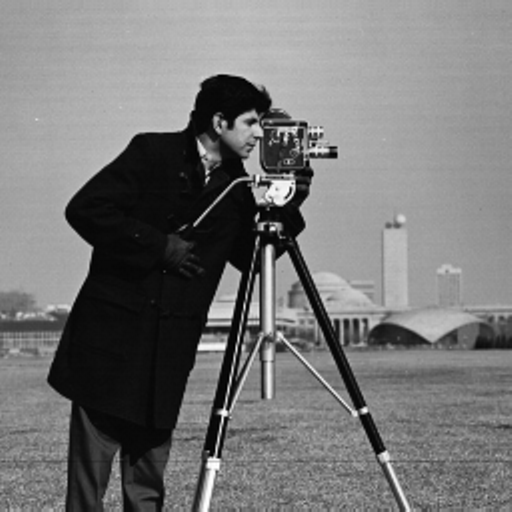

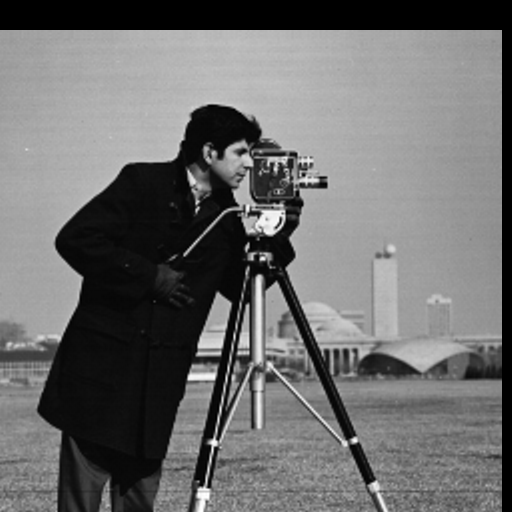

In [5]:
height, width = img.shape[:2]   
n_height, n_width = 30, -10  
T = np.float32([[1, 0, n_width], [0, 1, n_height]])   
img_translation = cv2.warpAffine(img, T, (width, height)) 
cv2_imshow(img) 
cv2_imshow(img_translation) 

▪ Translate the input image by (30, 10)

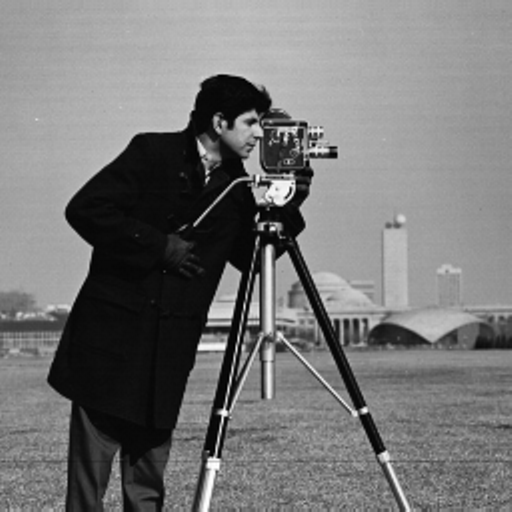

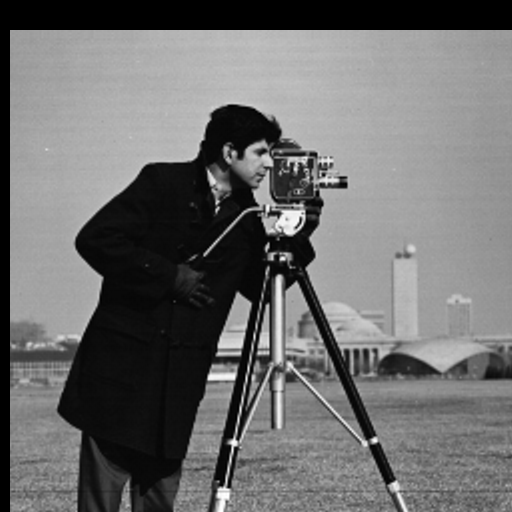

In [6]:
height, width = img.shape[:2] 
n_height, n_width = 30, 10
T = np.float32([[1, 0, n_width], [0, 1, n_height]]) 
img_translation = cv2.warpAffine(img, T, (width, height)) 
cv2_imshow(img) 
cv2_imshow(img_translation) 

### **b) Scale, rotation, translation**

Rotation

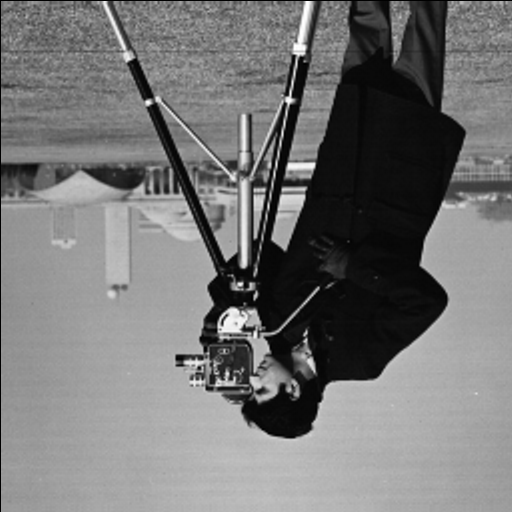

In [19]:
%matplotlib inline
img = data.camera()
rows,cols = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),180,1)
rot = cv2.warpAffine(img,M,(cols,rows))

cv2_imshow(rot)

Scaling

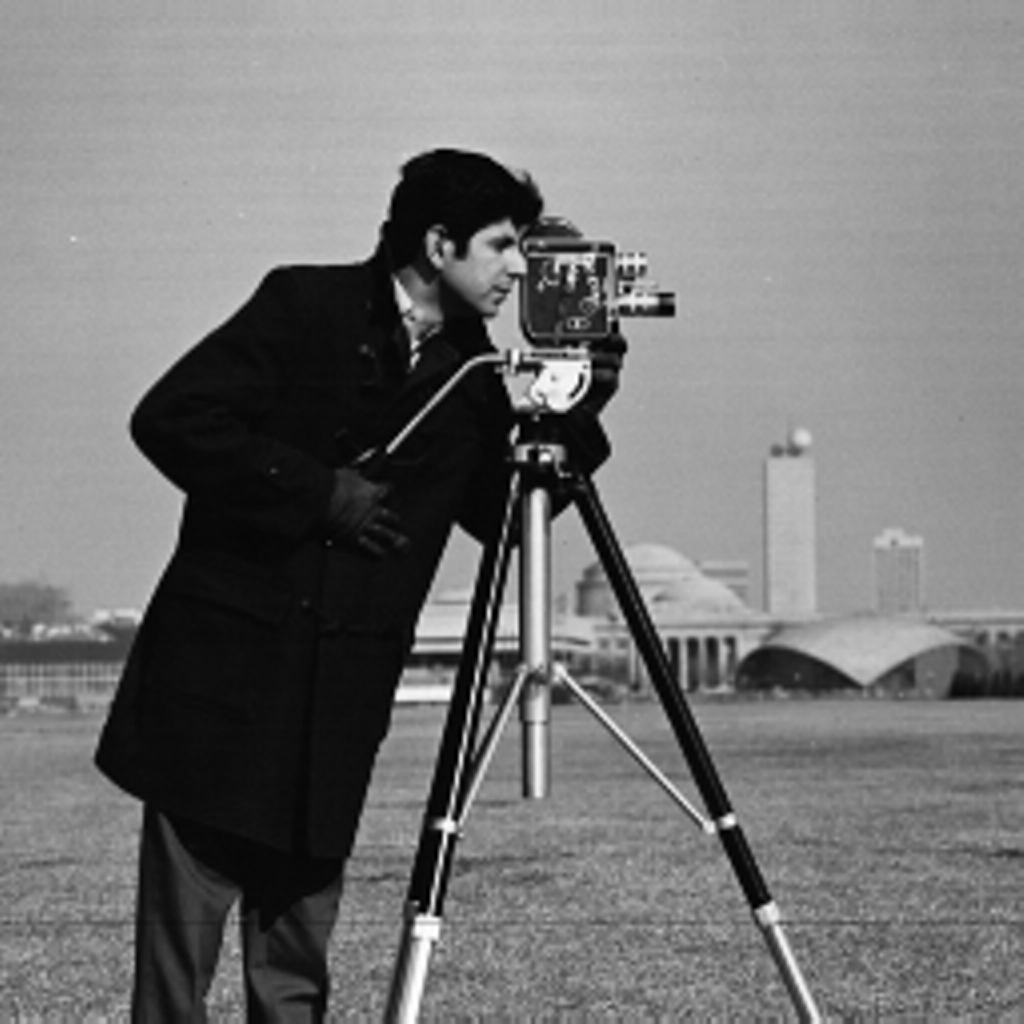

In [20]:
%matplotlib inline
img = data.camera()
rows,cols = img.shape
height, width = img.shape[:2]
scal = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
cv2_imshow(scal)

Translation

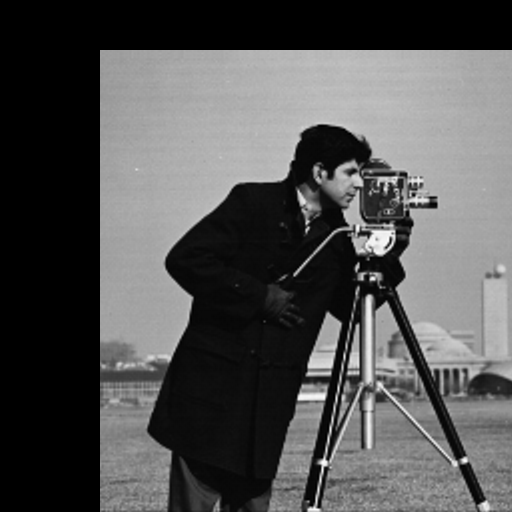

In [21]:
img = data.camera()
rows,cols = img.shape
M= np.float32([[1,0,100],[0,1,50]])
trs = cv2.warpAffine(img,M,(cols,rows))
cv2_imshow(trs)

## **2. Perform the following geometric transforms without using inbuilt functions**

In [26]:
from skimage import io
from skimage import transform as tf
import matplotlib.pyplot as plt

### **a) Apply the horizontal shear (shear parallel to the x axis) on the image with shear factor = 2. It converts the coordinates from (x,y) to the point (x+my, y) where m is the shear factor.**

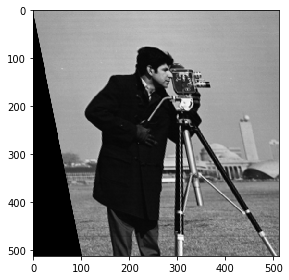

In [23]:
img = data.camera()
afine_tf = tf.AffineTransform(shear=0.2)
modified = tf.warp(img, inverse_map=afine_tf)
io.imshow(modified)
io.show()

### **b) Apply the vertical shear (shear parallel to the y axis) on the image with shear factor = 3. It converts the coordinates from (x,y) to the point (x, mx+y) where m is the shear factor.**

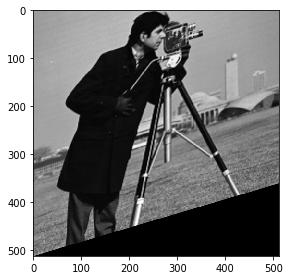

In [33]:
img = data.camera()/255
tf = transform.AffineTransform(shear=-0.3)
img3 = np.swapaxes(img, 0, 1)
img3 = transform.warp(img3, tf, order=1, preserve_range=True, mode='constant')
img3 = np.swapaxes(img3, 0, 1)
io.imshow(img3)
io.show()

## **3. Add salt and pepper noise to your input image using inbuilt function**

In [36]:
import random

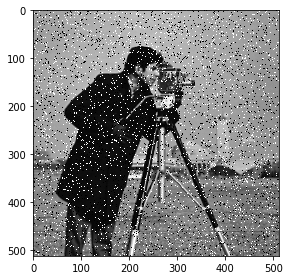

In [39]:
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image = data.camera()
noise_img = sp_noise(image,0.05)
io.imshow(noise_img)

### **a) Write a program to implement spatial domain median filter to remove salt and pepper noise without using inbuilt functions. For every 3X3 area, find the median of the pixels and replace the center pixel by the median.**

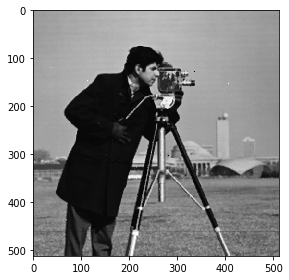

In [41]:
img_noisy1 = noise_img
m, n = img_noisy1.shape  
img_clear = np.zeros([m, n]) 
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = [img_noisy1[i-1, j-1], 
               img_noisy1[i-1, j], 
               img_noisy1[i-1, j + 1], 
               img_noisy1[i, j-1], 
               img_noisy1[i, j], 
               img_noisy1[i, j + 1], 
               img_noisy1[i + 1, j-1], 
               img_noisy1[i + 1, j], 
               img_noisy1[i + 1, j + 1]] 
          
        temp = sorted(temp) 
        img_clear[i, j]= temp[4] 
  
img_clear = img_clear.astype(np.uint8) 
io.imshow(img_clear)

### **b) Apply mean filtering as well on noisy image and find out which filter gives better result for salt and pepper noise.**

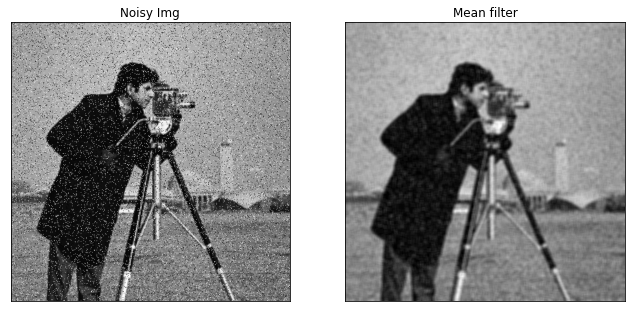

In [42]:
img_noise = noise_img
figure_size = 7
new_image = cv2.blur(img_noise,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(img_noise, cmap='gray'),plt.title('Noisy Img')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()